In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
%matplotlib inline

import tensorflow as tf
import statsmodels.api as sm
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.preprocessing import MinMaxScaler

import warnings
# import the_module_that_warns

warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [4]:
# Read train and test files
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

## train 처리

In [5]:
train = train_df.iloc[13647:16910]
time = train_df.iloc[13647:16910, 0:1]
time

,Time
13647,2018-02-15 02:00
13648,2018-02-15 03:00
13649,2018-02-15 04:00
13650,2018-02-15 05:00
13651,2018-02-15 06:00
13652,2018-02-15 07:00
13653,2018-02-15 08:00
13654,2018-02-15 09:00
13655,2018-02-15 10:00
13656,2018-02-15 11:00


In [6]:
train

,Time,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
13647,2018-02-15 02:00,0.314,0.440,0.461,0.308,NaN,0.174,0.341,0.400,0.279,...,0.656,0.219,0.222,0.094,0.355,0.149,0.390,NaN,0.347,0.135
13648,2018-02-15 03:00,0.309,0.292,0.524,0.279,NaN,0.198,0.343,0.393,0.272,...,0.659,0.224,0.282,0.071,0.164,0.142,0.404,NaN,0.293,0.137
13649,2018-02-15 04:00,0.327,0.298,0.486,0.364,NaN,0.155,0.388,0.388,0.273,...,0.598,0.201,0.257,0.062,0.136,0.174,0.216,NaN,0.346,0.169
13650,2018-02-15 05:00,0.303,0.254,0.514,0.953,NaN,0.198,0.338,0.402,0.263,...,0.593,0.191,0.258,0.132,0.128,0.168,0.258,NaN,0.325,0.325
13651,2018-02-15 06:00,0.273,0.290,0.486,0.547,NaN,0.153,0.492,0.352,0.496,...,0.714,0.184,0.215,0.407,0.198,0.168,0.197,NaN,0.306,0.188
13652,2018-02-15 07:00,0.798,0.377,0.506,0.538,NaN,0.222,0.714,0.543,0.465,...,0.776,0.267,0.218,0.052,0.148,0.149,0.270,NaN,0.337,0.122
13653,2018-02-15 08:00,0.497,0.247,0.721,0.529,NaN,0.277,1.066,0.884,0.307,...,0.892,0.584,0.253,0.065,0.167,0.322,0.217,NaN,0.310,0.738
13654,2018-02-15 09:00,0.428,0.272,0.397,0.595,NaN,0.381,0.716,0.488,0.141,...,0.902,1.894,0.246,0.052,0.505,0.888,0.313,NaN,0.291,0.480
13655,2018-02-15 10:00,0.357,0.257,0.440,0.492,NaN,0.461,0.660,0.437,0.208,...,0.802,0.925,0.244,0.061,0.839,0.639,0.350,NaN,0.339,0.402
13656,2018-02-15 11:00,0.387,0.276,0.426,0.532,NaN,0.265,0.554,0.376,0.547,...,1.038,0.603,0.238,0.056,1.214,0.975,0.369,NaN,0.429,0.406


In [7]:
wthr = pd.read_csv('data/train_wth.csv')
wthr

,Time,temp,wind,hue,hpa
0,2018-02-15 2:00,-1.2,3.9,39,1013.9
1,2018-02-15 3:00,-1.5,3.5,40,1014.0
2,2018-02-15 4:00,-1.9,5.3,36,1014.1
3,2018-02-15 5:00,-2.6,5.3,36,1014.0
4,2018-02-15 6:00,-2.9,4.3,38,1014.2
5,2018-02-15 7:00,-3.5,5.2,42,1014.0
6,2018-02-15 8:00,-4.0,4.7,43,1014.7
7,2018-02-15 9:00,-3.3,4.1,38,1015.0
8,2018-02-15 10:00,-2.6,4.9,37,1015.0
9,2018-02-15 11:00,-2.1,5.0,33,1014.9


In [8]:
train.head()

,Time,X692,X1272,X553,X1299,X4,X598,X1003,X1010,X1216,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
13647,2018-02-15 02:00,0.314,0.440,0.461,0.308,NaN,0.174,0.341,0.400,0.279,...,0.656,0.219,0.222,0.094,0.355,0.149,0.390,NaN,0.347,0.135
13648,2018-02-15 03:00,0.309,0.292,0.524,0.279,NaN,0.198,0.343,0.393,0.272,...,0.659,0.224,0.282,0.071,0.164,0.142,0.404,NaN,0.293,0.137
13649,2018-02-15 04:00,0.327,0.298,0.486,0.364,NaN,0.155,0.388,0.388,0.273,...,0.598,0.201,0.257,0.062,0.136,0.174,0.216,NaN,0.346,0.169
13650,2018-02-15 05:00,0.303,0.254,0.514,0.953,NaN,0.198,0.338,0.402,0.263,...,0.593,0.191,0.258,0.132,0.128,0.168,0.258,NaN,0.325,0.325
13651,2018-02-15 06:00,0.273,0.290,0.486,0.547,NaN,0.153,0.492,0.352,0.496,...,0.714,0.184,0.215,0.407,0.198,0.168,0.197,NaN,0.306,0.188


In [9]:
mode3 = pd.read_csv('data/f_mode.csv')
mode3

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
0,0.275,0.212,0.425,0.108,0.153,0.18,0.296,0.292,0.144,0.148,...,0.291,0.164,0.209,0.048,0.205,0.198,0.24,2.309,0.223,0.224


In [10]:
mode3 = mode3.dropna(how='all', axis=1)
mode3

,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,X381,...,X1164,X656,X1287,X324,X767,X1271,X1288,X58,X1033,X1163
0,0.275,0.212,0.425,0.108,0.153,0.18,0.296,0.292,0.144,0.148,...,0.291,0.164,0.209,0.048,0.205,0.198,0.24,2.309,0.223,0.224


In [11]:
train = train.dropna(how='all', axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 13647 to 16908
Columns: 1292 entries, Time to X1163
dtypes: float64(1291), object(1)
memory usage: 32.2+ MB


In [12]:
c = mode3.columns
train2 = pd.DataFrame()   # 새로운 데이터프레임 생성
n=0  # 현재 칼럼카운트를 보여주기 위한 변수

# 미터ID 리스트 c에서 1개씩 for loop
for i in tqdm_notebook(c):  
    n +=1   # 카운트 
    li = train[train[i].isnull()].index   # li: test데이터프레임의 특정 열(i)에서 Null인 셀 index추출 
    df = pd.DataFrame(train[i])    # df: test의 i열을 별개 데이터프레임으로 생성
    for t in li:    #  li(Null 인덱스)를 사용해 for loop
        df.loc[t] = mode3[i][0]  # null값에 t.hour 평균 대입
    print("%d. current column: %s, NaN count: %d" %(n, i, len(li)))   
    train2 = pd.concat([train2,df], axis=1)  # 평균 대치가 끝난 df를 test2에 concat해준다. 
    
train3 = pd.concat([time,train2],axis=1)

1. current column: X692, NaN count: 200
2. current column: X1272, NaN count: 199
3. current column: X553, NaN count: 223
4. current column: X1299, NaN count: 258
5. current column: X598, NaN count: 223
6. current column: X1003, NaN count: 327
7. current column: X1010, NaN count: 216
8. current column: X1216, NaN count: 200
9. current column: X1047, NaN count: 202
10. current column: X381, NaN count: 192
11. current column: X466, NaN count: 203
12. current column: X1420, NaN count: 199
13. current column: X686, NaN count: 199
14. current column: X711, NaN count: 196
15. current column: X1251, NaN count: 200
16. current column: X828, NaN count: 200
17. current column: X1350, NaN count: 258
18. current column: X1066, NaN count: 203
19. current column: X1293, NaN count: 231
20. current column: X1148, NaN count: 223
21. current column: X451, NaN count: 196
22. current column: X174, NaN count: 204
23. current column: X74, NaN count: 2858
24. current column: X626, NaN count: 200
25. current c

197. current column: X951, NaN count: 246
198. current column: X965, NaN count: 219
199. current column: X772, NaN count: 224
200. current column: X886, NaN count: 438
201. current column: X593, NaN count: 195
202. current column: X1121, NaN count: 223
203. current column: X1171, NaN count: 224
204. current column: X888, NaN count: 436
205. current column: X1332, NaN count: 258
206. current column: X690, NaN count: 199
207. current column: X1087, NaN count: 208
208. current column: X1213, NaN count: 200
209. current column: X665, NaN count: 202
210. current column: X795, NaN count: 210
211. current column: X430, NaN count: 190
212. current column: X484, NaN count: 200
213. current column: X114, NaN count: 0
214. current column: X1296, NaN count: 258
215. current column: X843, NaN count: 200
216. current column: X280, NaN count: 206
217. current column: X1158, NaN count: 250
218. current column: X1090, NaN count: 203
219. current column: X355, NaN count: 196
220. current column: X290, N

390. current column: X1326, NaN count: 258
391. current column: X19, NaN count: 1505
392. current column: X351, NaN count: 197
393. current column: X938, NaN count: 436
394. current column: X771, NaN count: 538
395. current column: X927, NaN count: 405
396. current column: X1402, NaN count: 258
397. current column: X1400, NaN count: 230
398. current column: X1434, NaN count: 199
399. current column: X921, NaN count: 435
400. current column: X1340, NaN count: 258
401. current column: X1250, NaN count: 200
402. current column: X236, NaN count: 204
403. current column: X890, NaN count: 435
404. current column: X1202, NaN count: 250
405. current column: X1247, NaN count: 198
406. current column: X180, NaN count: 204
407. current column: X662, NaN count: 198
408. current column: X415, NaN count: 192
409. current column: X198, NaN count: 207
410. current column: X805, NaN count: 198
411. current column: X360, NaN count: 196
412. current column: X526, NaN count: 195
413. current column: X1154

583. current column: X478, NaN count: 197
584. current column: X278, NaN count: 204
585. current column: X522, NaN count: 195
586. current column: X792, NaN count: 200
587. current column: X1219, NaN count: 605
588. current column: X1182, NaN count: 224
589. current column: X658, NaN count: 198
590. current column: X1059, NaN count: 231
591. current column: X1243, NaN count: 198
592. current column: X844, NaN count: 225
593. current column: X292, NaN count: 205
594. current column: X1410, NaN count: 199
595. current column: X1379, NaN count: 230
596. current column: X589, NaN count: 196
597. current column: X1140, NaN count: 222
598. current column: X1305, NaN count: 230
599. current column: X1359, NaN count: 230
600. current column: X684, NaN count: 199
601. current column: X999, NaN count: 219
602. current column: X871, NaN count: 436
603. current column: X829, NaN count: 199
604. current column: X1084, NaN count: 200
605. current column: X638, NaN count: 200
606. current column: X14

776. current column: X1422, NaN count: 198
777. current column: X488, NaN count: 195
778. current column: X1497, NaN count: 221
779. current column: X1413, NaN count: 198
780. current column: X854, NaN count: 228
781. current column: X458, NaN count: 196
782. current column: X708, NaN count: 196
783. current column: X27, NaN count: 1505
784. current column: X867, NaN count: 198
785. current column: X777, NaN count: 198
786. current column: X145, NaN count: 205
787. current column: X1403, NaN count: 258
788. current column: X531, NaN count: 196
789. current column: X507, NaN count: 196
790. current column: X575, NaN count: 223
791. current column: X1072, NaN count: 202
792. current column: X311, NaN count: 196
793. current column: X1038, NaN count: 200
794. current column: X1013, NaN count: 220
795. current column: X863, NaN count: 198
796. current column: X199, NaN count: 206
797. current column: X503, NaN count: 222
798. current column: X301, NaN count: 192
799. current column: X319, 

969. current column: X515, NaN count: 196
970. current column: X1217, NaN count: 200
971. current column: X950, NaN count: 215
972. current column: X1386, NaN count: 258
973. current column: X530, NaN count: 221
974. current column: X1453, NaN count: 227
975. current column: X1156, NaN count: 222
976. current column: X582, NaN count: 223
977. current column: X660, NaN count: 226
978. current column: X113, NaN count: 0
979. current column: X840, NaN count: 201
980. current column: X998, NaN count: 216
981. current column: X799, NaN count: 204
982. current column: X1204, NaN count: 250
983. current column: X572, NaN count: 197
984. current column: X1174, NaN count: 249
985. current column: X807, NaN count: 200
986. current column: X1110, NaN count: 224
987. current column: X12, NaN count: 1505
988. current column: X985, NaN count: 214
989. current column: X1069, NaN count: 200
990. current column: X257, NaN count: 208
991. current column: X880, NaN count: 434
992. current column: X919, N

1158. current column: X170, NaN count: 202
1159. current column: X95, NaN count: 0
1160. current column: X1199, NaN count: 247
1161. current column: X93, NaN count: 0
1162. current column: X841, NaN count: 199
1163. current column: X967, NaN count: 223
1164. current column: X687, NaN count: 198
1165. current column: X1022, NaN count: 201
1166. current column: X780, NaN count: 167
1167. current column: X1268, NaN count: 199
1168. current column: X887, NaN count: 436
1169. current column: X1388, NaN count: 229
1170. current column: X640, NaN count: 200
1171. current column: X90, NaN count: 0
1172. current column: X552, NaN count: 195
1173. current column: X1173, NaN count: 224
1174. current column: X935, NaN count: 435
1175. current column: X1118, NaN count: 229
1176. current column: X434, NaN count: 196
1177. current column: X1054, NaN count: 201
1178. current column: X562, NaN count: 197
1179. current column: X693, NaN count: 221
1180. current column: X1375, NaN count: 255
1181. curren

In [13]:
train3 = pd.merge(train3, wthr, on="Time")
train3

,Time,X692,X1272,X553,X1299,X598,X1003,X1010,X1216,X1047,...,X767,X1271,X1288,X58,X1033,X1163,temp,wind,hue,hpa
0,2018-02-15 10:00,0.357,0.257,0.440,0.492,0.461,0.660,0.437,0.208,0.245,...,0.839,0.639,0.350,2.309,0.339,0.402,-2.6,4.9,37,1015.0
1,2018-02-15 11:00,0.387,0.276,0.426,0.532,0.265,0.554,0.376,0.547,0.148,...,1.214,0.975,0.369,2.309,0.429,0.406,-2.1,5.0,33,1014.9
2,2018-02-15 12:00,0.360,0.277,0.477,0.351,0.293,0.687,1.229,0.701,0.153,...,0.861,0.889,0.216,2.309,0.403,0.261,-0.9,4.3,28,1014.8
3,2018-02-15 13:00,0.333,0.281,0.432,0.335,0.255,0.516,0.669,0.506,0.139,...,0.356,0.620,0.957,2.309,0.314,0.256,0.6,4.9,20,1014.1
4,2018-02-15 14:00,0.350,0.257,0.468,0.298,0.443,0.436,0.682,0.670,0.135,...,0.318,0.600,1.189,2.309,0.420,0.404,1.5,4.3,26,1013.6
5,2018-02-15 15:00,0.751,0.262,0.427,0.295,0.462,0.531,0.701,0.530,0.324,...,0.474,0.440,0.990,2.309,0.492,0.423,1.7,3.8,24,1013.6
6,2018-02-15 16:00,1.499,0.260,0.438,0.278,0.348,0.494,1.366,0.570,0.486,...,1.094,0.439,0.950,2.309,0.176,0.308,1.7,4.1,30,1012.9
7,2018-02-15 17:00,1.339,0.241,0.414,0.328,0.192,0.469,1.105,0.725,0.633,...,1.156,0.406,0.816,2.309,0.166,0.192,1.0,3.5,35,1012.5
8,2018-02-15 18:00,1.241,0.267,0.588,0.277,0.146,0.889,0.542,0.997,0.640,...,1.550,0.616,0.610,2.309,0.184,0.239,0.0,3.6,36,1012.4
9,2018-02-15 19:00,0.741,0.253,0.708,0.359,0.138,1.082,2.024,0.719,0.319,...,1.126,0.629,0.670,2.309,0.175,0.551,-0.5,2.7,36,1012.8


In [14]:
train3['Time'] = pd.to_datetime(train3.Time)
train3 = train3.set_index('Time')

In [15]:
train3.to_csv('train0.csv')

In [66]:
len(train3)

1890

In [15]:
time = []; place_id = []; target = []; temp = []; wind = []; hue = []; hpa = [];

for i in tqdm_notebook(train3.columns):
    for j in range(len(train3)):
        place_id.append(i)
        time.append(train3.index[j])
        target.append(train3[i].iloc[j])
        temp.append(train3['temp'].iloc[j])
        wind.append(train3['wind'].iloc[j])
        hue.append(train3['hue'].iloc[j])
        hpa.append(train3['hpa'].iloc[j])
new_df = pd.DataFrame({'place_id': place_id, 'time':time, 'target': target, 'temp': temp, 'wind': wind, 'hue': hue, 'hpa': hpa })
new_df = new_df.dropna()
new_df = new_df.set_index('time')
new_df.head()

,place_id,target,temp,wind,hue,hpa
time,,,,,,
2018-02-15 10:00:00,X692,0.357,-2.6,4.9,37,1015.0
2018-02-15 11:00:00,X692,0.387,-2.1,5.0,33,1014.9
2018-02-15 12:00:00,X692,0.360,-0.9,4.3,28,1014.8
2018-02-15 13:00:00,X692,0.333,0.6,4.9,20,1014.1
2018-02-15 14:00:00,X692,0.350,1.5,4.3,26,1013.6


In [16]:
new_df_1 = new_df.copy()

In [121]:
new_df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2436210 entries, 2018-02-15 10:00:00 to 2018-06-29 23:00:00
Data columns (total 6 columns):
place_id    object
target      float64
temp        float64
wind        float64
hue         int64
hpa         float64
dtypes: float64(4), int64(1), object(1)
memory usage: 170.1+ MB


In [18]:
new_df_1 = new_df_1.iloc[:2428650]

In [19]:
new_df_1

,place_id,target,temp,wind,hue,hpa
time,,,,,,
2018-02-15 10:00:00,X692,0.357,-2.6,4.9,37,1015.0
2018-02-15 11:00:00,X692,0.387,-2.1,5.0,33,1014.9
2018-02-15 12:00:00,X692,0.360,-0.9,4.3,28,1014.8
2018-02-15 13:00:00,X692,0.333,0.6,4.9,20,1014.1
2018-02-15 14:00:00,X692,0.350,1.5,4.3,26,1013.6
2018-02-15 15:00:00,X692,0.751,1.7,3.8,24,1013.6
2018-02-15 16:00:00,X692,1.499,1.7,4.1,30,1012.9
2018-02-15 17:00:00,X692,1.339,1.0,3.5,35,1012.5
2018-02-15 18:00:00,X692,1.241,0.0,3.6,36,1012.4


In [20]:
new_df.to_csv("train_new.csv")

## test 처리

In [16]:
test_df = pd.read_csv('data/test.csv')
test_df

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017.7.1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
1,2017.7.1 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2,2017.7.1 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
3,2017.7.1 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
4,2017.7.1 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN
5,2017.7.1 5:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251,0.021,NaN
6,2017.7.1 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239,0.021,NaN
7,2017.7.1 7:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,0.020,NaN
8,2017.7.1 8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176,0.021,NaN
9,2017.7.1 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733,0.021,NaN


In [17]:
time_te = test_df.iloc[:, 0:1]
time_te

,Time
0,2017.7.1 0:00
1,2017.7.1 1:00
2,2017.7.1 2:00
3,2017.7.1 3:00
4,2017.7.1 4:00
5,2017.7.1 5:00
6,2017.7.1 6:00
7,2017.7.1 7:00
8,2017.7.1 8:00
9,2017.7.1 9:00


In [18]:
t_wthr = pd.read_csv('data/test_wth.csv')
t_wthr = t_wthr.iloc[:,0:5]
t_wthr

,Time,temp,wind,hue,hpa
0,2017-07-01 0:00,22.8,2.1,91.0,1000.0
1,2017-07-01 1:00,22.7,2.4,92.0,999.5
2,2017-07-01 2:00,22.3,1.9,95.0,999.4
3,2017-07-01 3:00,22.0,1.8,95.0,998.8
4,2017-07-01 4:00,21.8,2.4,95.0,998.7
5,2017-07-01 5:00,21.8,1.3,94.0,999.1
6,2017-07-01 6:00,21.8,1.5,95.0,999.0
7,2017-07-01 7:00,21.9,1.4,93.0,999.8
8,2017-07-01 8:00,22.2,1.7,91.0,999.9
9,2017-07-01 9:00,23.1,1.5,86.0,1000.3


In [19]:
test = test_df.dropna(how='all', axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 201 entries, Time to X230
dtypes: float64(200), object(1)
memory usage: 13.4+ MB


In [20]:
t_mode1 =  pd.read_csv('data/f_t_mode.csv')

In [21]:
t_mode1

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,1.434,0.25,0.266,0.305,0.185,0.079,0.283,0.253,0.02,0.24,...,0.17,0.088,0.219,0.154,0.092,0.094,0.131,1.109,0.225,0.26


In [22]:
mt = t_mode1.columns
test2 = pd.DataFrame()   # 새로운 데이터프레임 생성
n=0  # 현재 칼럼카운트를 보여주기 위한 변수

# 미터ID 리스트 c에서 1개씩 for loop
for i in tqdm_notebook(mt):  
    n +=1   # 카운트 
    li = test[test[i].isnull()].index   # li: test데이터프레임의 특정 열(i)에서 Null인 셀 index추출 
    df = pd.DataFrame(test[i])    # df: test의 i열을 별개 데이터프레임으로 생성
    for t in li:    #  li(Null 인덱스)를 사용해 for loop
        df.loc[t] = t_mode1[i][0]  # null값에 t.hour 평균 대입
    print("%d. current column: %s, NaN count: %d" %(n, i, len(li)))   
    test2 = pd.concat([test2,df], axis=1)  # 평균 대치가 끝난 df를 test2에 concat해준다. 
    
test3 = pd.concat([time_te,test2],axis=1)

1. current column: X26, NaN count: 7003
2. current column: X303, NaN count: 1852
3. current column: X241, NaN count: 1894
4. current column: X435, NaN count: 2008
5. current column: X402, NaN count: 2003
6. current column: X352, NaN count: 1903
7. current column: X305, NaN count: 2021
8. current column: X350, NaN count: 1926
9. current column: X326, NaN count: 2037
10. current column: X299, NaN count: 2017
11. current column: X160, NaN count: 2088
12. current column: X125, NaN count: 0
13. current column: X211, NaN count: 1905
14. current column: X349, NaN count: 2016
15. current column: X407, NaN count: 2006
16. current column: X330, NaN count: 1985
17. current column: X132, NaN count: 1886
18. current column: X231, NaN count: 2094
19. current column: X225, NaN count: 2065
20. current column: X16, NaN count: 7003
21. current column: X286, NaN count: 2040
22. current column: X354, NaN count: 1969
23. current column: X353, NaN count: 2024
24. current column: X76, NaN count: 0
25. curren

196. current column: X443, NaN count: 1997
197. current column: X347, NaN count: 2012
198. current column: X75, NaN count: 0
199. current column: X107, NaN count: 0
200. current column: X230, NaN count: 2109



In [23]:
t_wthr

,Time,temp,wind,hue,hpa
0,2017-07-01 0:00,22.8,2.1,91.0,1000.0
1,2017-07-01 1:00,22.7,2.4,92.0,999.5
2,2017-07-01 2:00,22.3,1.9,95.0,999.4
3,2017-07-01 3:00,22.0,1.8,95.0,998.8
4,2017-07-01 4:00,21.8,2.4,95.0,998.7
5,2017-07-01 5:00,21.8,1.3,94.0,999.1
6,2017-07-01 6:00,21.8,1.5,95.0,999.0
7,2017-07-01 7:00,21.9,1.4,93.0,999.8
8,2017-07-01 8:00,22.2,1.7,91.0,999.9
9,2017-07-01 9:00,23.1,1.5,86.0,1000.3


In [24]:
test3

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017.7.1 0:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.275,0.021,0.260
1,2017.7.1 1:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.222,0.021,0.260
2,2017.7.1 2:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.237,0.021,0.260
3,2017.7.1 3:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.229,0.020,0.260
4,2017.7.1 4:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.202,0.021,0.260
5,2017.7.1 5:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.251,0.021,0.260
6,2017.7.1 6:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.239,0.021,0.260
7,2017.7.1 7:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.207,0.020,0.260
8,2017.7.1 8:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.176,0.021,0.260
9,2017.7.1 9:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.170,0.088,0.219,0.154,0.092,0.094,0.131,0.733,0.021,0.260


In [25]:
test3['Time'] = pd.to_datetime(test3.Time)
t_wthr['Time'] = pd.to_datetime(t_wthr.Time)

In [26]:
test4 = pd.merge(test3, t_wthr, on='Time')
test4

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X20,X443,X347,X75,X107,X230,temp,wind,hue,hpa
0,2017-07-01 00:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.275,0.021,0.260,22.8,2.1,91.0,1000.0
1,2017-07-01 01:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.222,0.021,0.260,22.7,2.4,92.0,999.5
2,2017-07-01 02:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.237,0.021,0.260,22.3,1.9,95.0,999.4
3,2017-07-01 03:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.229,0.020,0.260,22.0,1.8,95.0,998.8
4,2017-07-01 04:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.202,0.021,0.260,21.8,2.4,95.0,998.7
5,2017-07-01 05:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.251,0.021,0.260,21.8,1.3,94.0,999.1
6,2017-07-01 06:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.239,0.021,0.260,21.8,1.5,95.0,999.0
7,2017-07-01 07:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.207,0.020,0.260,21.9,1.4,93.0,999.8
8,2017-07-01 08:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.176,0.021,0.260,22.2,1.7,91.0,999.9
9,2017-07-01 09:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,...,0.092,0.094,0.131,0.733,0.021,0.260,23.1,1.5,86.0,1000.3


In [27]:
test4 = test4.set_index('Time')

In [28]:
test4.to_csv('test0.csv')

In [129]:
1787040 - 35040

1752000

In [34]:
time = []; place_id = []; target = []; temp = []; wind = []; hue = []; hpa = [];

for i in tqdm_notebook(test4.columns):
    for j in range(len(test4)):
        place_id.append(i)
        time.append(test4.index[j])
        target.append(test4[i].iloc[j])
        temp.append(test4['temp'].iloc[j])
        wind.append(test4['wind'].iloc[j])
        hue.append(test4['hue'].iloc[j])
        hpa.append(test4['hpa'].iloc[j])
new_df_test = pd.DataFrame({'place_id': place_id, 'time':time, 'target': target, 'temp': temp, 'wind': wind, 'hue': hue, 'hpa': hpa })
new_df_test = new_df_test.dropna()
new_df_test = new_df_test.set_index('time')
new_df_test.head()

,place_id,target,temp,wind,hue,hpa
time,,,,,,
2017-07-01 00:00:00,X26,1.434,22.8,2.1,91.0,1000.0
2017-07-01 01:00:00,X26,1.434,22.7,2.4,92.0,999.5
2017-07-01 02:00:00,X26,1.434,22.3,1.9,95.0,999.4
2017-07-01 03:00:00,X26,1.434,22.0,1.8,95.0,998.8
2017-07-01 04:00:00,X26,1.434,21.8,2.4,95.0,998.7


In [35]:
new_df_test = new_df_test.iloc[:1752000]

In [36]:
new_df_test_1 = new_df_test.copy()

In [140]:
import itertools
from statsmodels.tsa.arima_model import ARIMA 
submission = pd.read_csv('data/submission.csv')

In [135]:
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [136]:
def get_optimal_params(y):
    param_dict = {}
    for param in pdq:
        try:
            model = ARIMA(y, order=param)
            results_ARIMA = model.fit(disp=-1)
            param_dict[results_ARIMA.aic] = param
        except:
            continue

    min_aic = min(param_dict.keys())
    optimal_params = param_dict[min_aic]
    return optimal_params

In [ ]:
# 1 시간별 예측
    model = lgb(temp_1h['target']  # target 을 추측하고자 함
                  ) # AIC를 최소화하는 최적의 파라미터 
    results_lgb = model.fit(disp=-1)  
    fcst = results_lgb.forecast(24) # 24시간 예측

    a = pd.DataFrame() # a: 예측값을 담을 데이터프레임 생성
    
    for i in range(24):
        a['X2018_7_1_'+str(i+1)+'h']=[fcst[0][i]] # column명 지정 및 예측값 대입

# 1 일별 예측
    model = ARIMA(temp_1day['target'], 
                  order=get_optimal_params(temp_1day['target'])) 
    results_ARIMA = model.fit(disp=-1)
    fcst = results_ARIMA.forecast(10) # 10일을 예측

    for i in range(10):
        a['X2018_7_'+str(i+1)+'_d']=[fcst[0][i]] # column명 지정 및 예측값 대입
    
    
    # 월별 예측
    # 일별 예측의 sum 사용
    fcst = results_ARIMA.forecast(153)
    
    # column명을 지정 및 예측값 대입
    a['X2018_7_m'] = [np.sum(fcst[0][:31])] # 7월 
    a['X2018_8_m'] = [np.sum(fcst[0][31:62])] # 8월
    a['X2018_9_m'] = [np.sum(fcst[0][62:92])] # 9월
    a['X2018_10_m'] = [np.sum(fcst[0][92:123])] # 10월
    a['X2018_11_m'] = [np.sum(fcst[0][123:153])] # 11월
    
    # a 에 meter_id를 현재 예측하고 있는 열의 id(key)로 대입
    a['meter_id'] = key 
    
    # agg{ 미터ID: 시간별(subimssion.columns는 예측시간칼럼들) a의 예측값}
    agg[key] = a[submission.columns.tolist()]
    print(key)
print('---- Modeling Done ----')

In [142]:
output1 = pd.concat(agg, ignore_index = False)
output2 = output1.reset_index().drop(['level_0', 'level_1'], axis=1)
output2['id'] = output2['meter_id'].str.replace('X','').astype(int)
output2 = output2.sort_values(by='id', ascending=True).drop(['id'], axis=1).reset_index(drop=True)
output2.head()

,meter_id,X2018_7_1_1h,X2018_7_1_2h,X2018_7_1_3h,X2018_7_1_4h,X2018_7_1_5h,X2018_7_1_6h,X2018_7_1_7h,X2018_7_1_8h,X2018_7_1_9h,...,X2018_7_6_d,X2018_7_7_d,X2018_7_8_d,X2018_7_9_d,X2018_7_10_d,X2018_7_m,X2018_8_m,X2018_9_m,X2018_10_m,X2018_11_m
0,X5,6.849510,6.689826,6.602653,6.555072,6.529107,6.514946,6.507228,6.503029,6.500751,...,152.463941,152.443042,152.435868,152.436102,152.440334,4730.212240,4735.712612,4591.110672,4752.582776,4607.436636
1,X7,1.342853,1.372029,1.397167,1.418827,1.437490,1.453570,1.467425,1.479362,1.489648,...,42.628761,42.478598,42.407362,42.376357,42.365857,1334.131603,1325.062243,1292.216341,1345.518196,1312.012424
2,X10,2.297198,2.461578,2.602899,2.724392,2.828836,2.918620,2.995799,3.062139,3.119160,...,87.402158,87.279284,87.183967,87.098259,87.015901,2701.829075,2605.055705,2447.305152,2452.708276,2299.872156
3,X16,3.371386,3.539948,3.680263,3.797065,3.894294,3.975230,4.042604,4.098687,4.145372,...,114.964914,114.863567,114.822959,114.812149,114.815957,3578.370220,3579.390259,3480.292264,3613.213753,3513.024677
4,X18,2.499759,2.508434,2.515430,2.521070,2.525619,2.529286,2.532243,2.534626,2.536547,...,62.058246,62.005153,61.976172,61.960352,61.951716,1925.492898,1920.181389,1858.240054,1920.181389,1858.240054


In [143]:
output2.to_csv('subm1.csv', index=False)

In [28]:
train3; test4

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X20,X443,X347,X75,X107,X230,temp,wind,hue,hpa
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.275,0.021,0.260,22.8,2.1,91.0,1000.0
2017-07-01 01:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.222,0.021,0.260,22.7,2.4,92.0,999.5
2017-07-01 02:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.237,0.021,0.260,22.3,1.9,95.0,999.4
2017-07-01 03:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.229,0.020,0.260,22.0,1.8,95.0,998.8
2017-07-01 04:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.202,0.021,0.260,21.8,2.4,95.0,998.7
2017-07-01 05:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.251,0.021,0.260,21.8,1.3,94.0,999.1
2017-07-01 06:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.239,0.021,0.260,21.8,1.5,95.0,999.0
2017-07-01 07:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.207,0.020,0.260,21.9,1.4,93.0,999.8
2017-07-01 08:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.092,0.094,0.131,0.176,0.021,0.260,22.2,1.7,91.0,999.9


In [29]:
test4['Various', 'Day'] = test4.index.dayofyear
test4['Various', 'Hour'] = test4.index.hour

In [30]:
test4

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X347,X75,X107,X230,temp,wind,hue,hpa,"(Various, Day)","(Various, Hour)"
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.275,0.021,0.260,22.8,2.1,91.0,1000.0,182,0
2017-07-01 01:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.222,0.021,0.260,22.7,2.4,92.0,999.5,182,1
2017-07-01 02:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.237,0.021,0.260,22.3,1.9,95.0,999.4,182,2
2017-07-01 03:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.229,0.020,0.260,22.0,1.8,95.0,998.8,182,3
2017-07-01 04:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.202,0.021,0.260,21.8,2.4,95.0,998.7,182,4
2017-07-01 05:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.251,0.021,0.260,21.8,1.3,94.0,999.1,182,5
2017-07-01 06:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.239,0.021,0.260,21.8,1.5,95.0,999.0,182,6
2017-07-01 07:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.207,0.020,0.260,21.9,1.4,93.0,999.8,182,7
2017-07-01 08:00:00,1.434,0.250,0.266,0.305,0.185,0.079,0.283,0.253,0.020,0.240,...,0.131,0.176,0.021,0.260,22.2,1.7,91.0,999.9,182,8


In [31]:
target_h = [test2.columns]

In [32]:
shift_days = 1
shift_steps = shift_days * 24  # Number of hours.

In [33]:
df_targets = test4[test2.columns].shift(-shift_steps)

In [34]:
x_data = test4.values[0:-shift_steps]

In [35]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (8736, 206)


In [36]:
y_data = df_targets.values[:-shift_steps]

In [37]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (8736, 200)


In [38]:
num_data = len(x_data)
num_data

8736

In [39]:
train_split = 0.9

In [40]:
num_train = int(train_split * num_data)
num_train

7862

In [41]:
num_test = num_data - num_train
num_test

874

In [42]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

8736

In [43]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

8736

In [44]:
num_x_signals = x_data.shape[1]
num_x_signals

206

In [45]:
num_y_signals = y_data.shape[1]
num_y_signals

200

In [46]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -17.1
Max: 1024.8


In [47]:
x_scaler = MinMaxScaler()

In [48]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [49]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0000000000000004


In [50]:
x_test_scaled = x_scaler.transform(x_test)

In [51]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [52]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [53]:
batch_size = 256

sequence_length = 24 * 7 * 8
sequence_length

1344

In [54]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [55]:
x_batch, y_batch = next(generator)

In [56]:
print(x_batch.shape)
print(y_batch.shape)

(256, 1344, 206)
(256, 1344, 200)


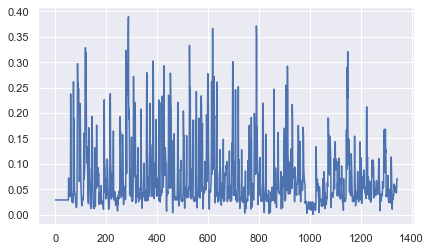

In [60]:
batch = 1   # First sequence in the batch.
signal = 1  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

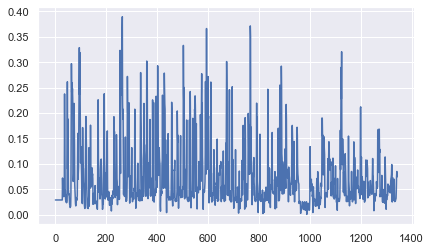

In [61]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [78]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [82]:
model = Sequential()
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))
model.add(Dense(num_y_signals, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [83]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [84]:
warmup_steps = 50

In [85]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [86]:
optimizer = RMSprop(lr=1e-3)
model.compile(loss=loss_mse_warmup, optimizer=optimizer)
model.summary()

Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         1104384   
_________________________________________________________________
dense (Dense)                (None, None, 200)         102600    
Total params: 1,206,984
Trainable params: 1,206,984
Non-trainable params: 0
_________________________________________________________________


In [87]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [88]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [89]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [90]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [91]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [ ]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
